# EDA on the Penguins Data Set

First of all we add the libraries that I'm going to use for this project.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('dark_background')

# And this one just in case:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

## Add the Data Set

Now I open the data set I'm going to use.

In [4]:
df = pd.read_csv('penguins.csv')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Missing values

In [6]:
df.isnull().sum()/len(df)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

We can see that the percentage of missing values is not representative enough to fix them, so I'm going to drop the lines where there is a missing value.

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## Insights

In [9]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [10]:
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [11]:
b_depth_mean = df['bill_depth_mm'].mean()
b_depth_median = df['bill_depth_mm'].median()
b_depth_mode = df['bill_depth_mm'].mode()

print('Mean: ', b_depth_mean,
      '\nMedian: ', b_depth_median,
      '\nMode: ', b_depth_mode)

Mean:  17.164864864864864 
Median:  17.3 
Mode:  0    17.0
Name: bill_depth_mm, dtype: float64


In [12]:
b_length_mean = df['bill_length_mm'].mean() 
b_length_median = df['bill_length_mm'].median()
b_length_mode = df['bill_length_mm'].mode()

print('Mean: ', b_length_mean,
      '\nMedian: ', b_length_median,
      '\nMode: ', b_length_mode)

Mean:  43.99279279279279 
Median:  44.5 
Mode:  0    41.1
Name: bill_length_mm, dtype: float64


In [13]:
f_length_mean = df['flipper_length_mm'].mean()
f_length_median = df['flipper_length_mm'].median()
f_length_mode = df['flipper_length_mm'].mode()

print('Mean: ', f_length_mean,
      '\nMedian: ', f_length_median,
      '\nMode: ', f_length_mode)

Mean:  200.96696696696696 
Median:  197.0 
Mode:  0    190.0
Name: flipper_length_mm, dtype: float64


In [14]:
b_mass_mean = df['body_mass_g'].mean()
b_mass_median = df['body_mass_g'].median()
b_mass_mode = df['body_mass_g'].mode()

print('Mean: ', b_mass_mean,
      '\nMedian: ', b_mass_median,
      '\nMode: ', b_mass_mode)

Mean:  4207.057057057057 
Median:  4050.0 
Mode:  0    3800.0
Name: body_mass_g, dtype: float64


In [15]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [16]:
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [17]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## Graphics

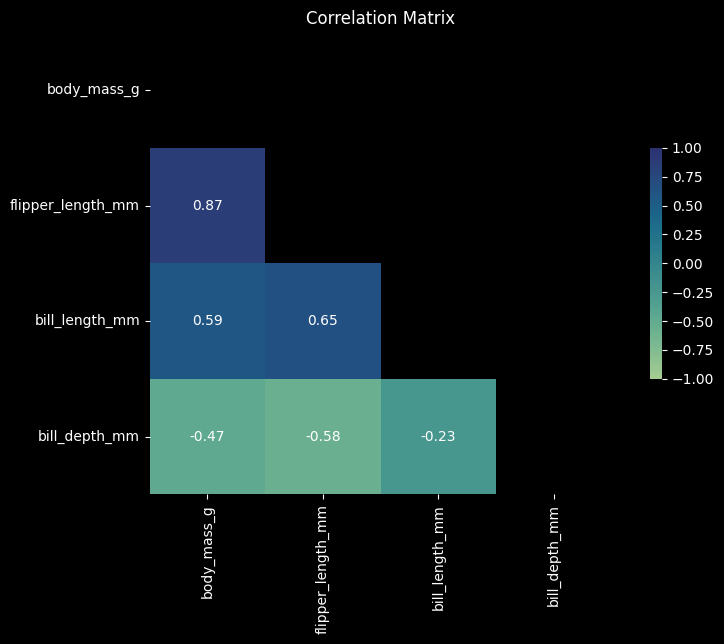

In [32]:
corr = df.corr(method = 'pearson', numeric_only=True).sort_values(by = 'body_mass_g', axis = 0, ascending = False).sort_values(by = 'body_mass_g', axis = 1, ascending = False)

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10,6))
cmap = "crest"

sns.heatmap(
    corr.iloc[0:5,0:5],
    mask=mask[0:5,0:5],
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    cbar_kws={"shrink": .5},
    annot =True) 

plt.title('Correlation Matrix')
plt.savefig('Graphics/Correlation_matrix.png')

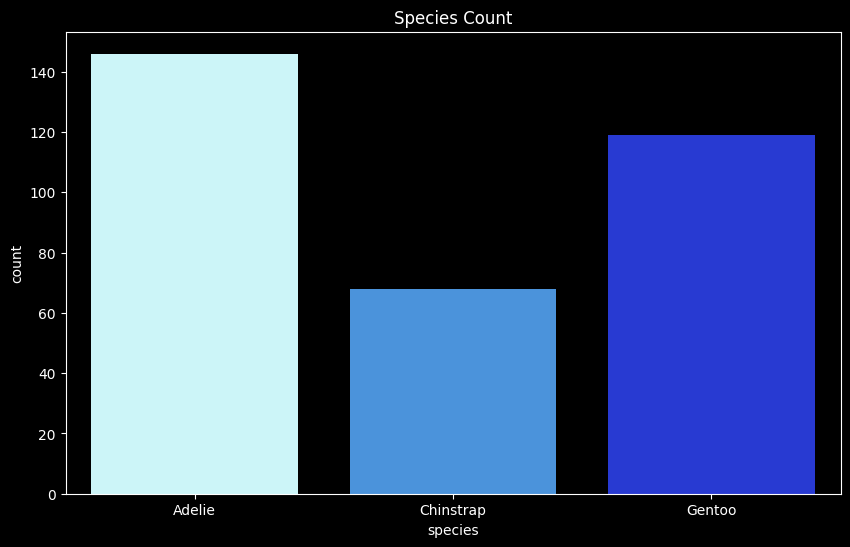

In [19]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='species',
    hue='species',
    palette=['#C5FBFF', '#3393F3','#0C24EE'],
    legend=False
)

plt.title('Species Count')
plt.savefig('Graphics/Count_Species.png')
plt.show()

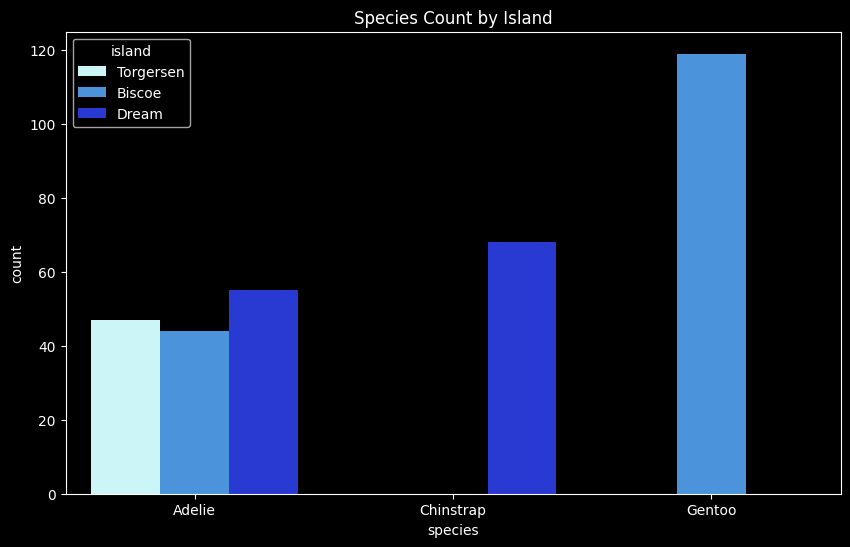

In [20]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='species',
    hue=df['island'],
    palette=['#C5FBFF', '#3393F3','#0C24EE']
)

plt.title('Species Count by Island')
plt.savefig('Graphics/Count_Species_Island.png')
plt.show()

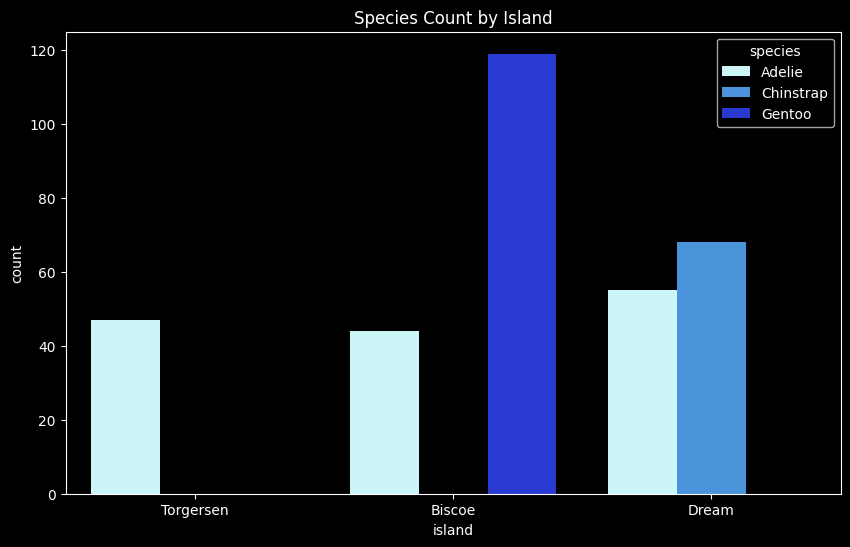

In [29]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='island',
    hue=df['species'],
    palette=['#C5FBFF', '#3393F3','#0C24EE']
)

plt.title('Species Count by Island')
plt.savefig('Graphics/Count_Island_Species.png')
plt.show()

<Figure size 1500x1000 with 0 Axes>

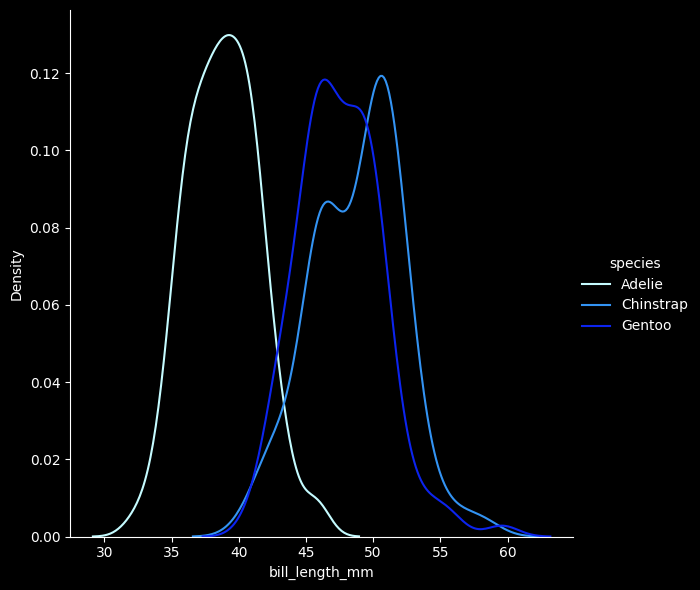

In [40]:
plt.figure(figsize=(15, 10))

sns.FacetGrid(
    data=df,
    hue='species',
    height=6,
    palette=['#C5FBFF', '#3393F3','#0C24EE']
).map(sns.kdeplot, 'bill_length_mm').add_legend()
    
#plt.title('Body Mass Distribution by Species')
plt.savefig('Graphics/Body_Mass_Distribution.png')
plt.show()

<Figure size 1800x1200 with 0 Axes>

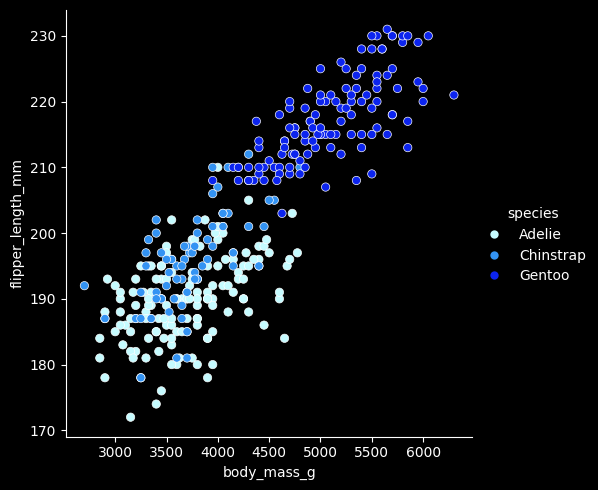

In [39]:
plt.figure(figsize=(18, 12))

sns.relplot(
    data = df,
    x = 'body_mass_g',
    y = 'flipper_length_mm',
    hue = 'species',
    palette=['#C5FBFF', '#3393F3','#0C24EE' ])

#plt.title('Body Mass to Flipper Length and Island Ratio')
plt.savefig('Graphics/Body_Mass_Flipper_Island_Ratio.png')
plt.show()

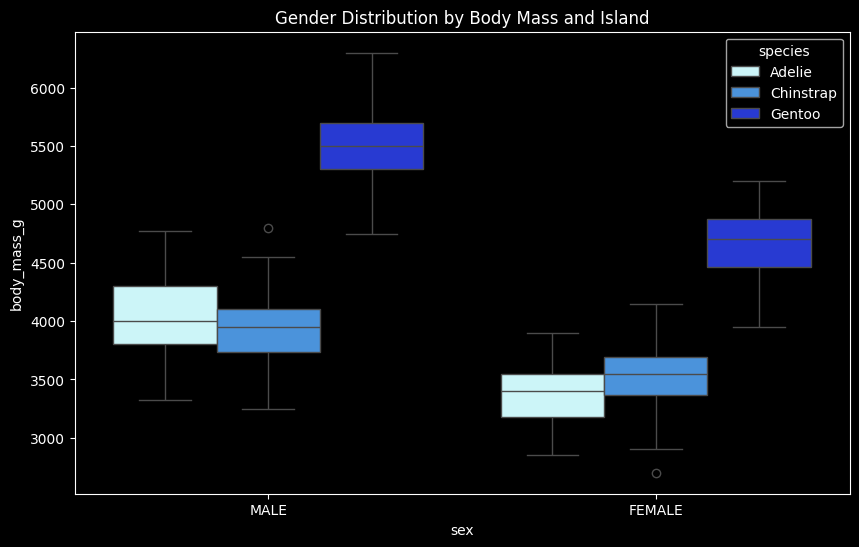

In [23]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='sex',
    y='body_mass_g',
    hue=df['species'],
    palette=['#C5FBFF', '#3393F3','#0C24EE' ]
    )

plt.title('Gender Distribution by Body Mass and Island')
plt.savefig('Graphics/Gender_Distribution_by_Body_Mass_and_Island.png')
plt.show()

Generally female penguins are smaller and with less body mass. 

However the femanle Gentoo penguis have generally more body mass than the males of the Adeline and Chinstrap species.

In [24]:
fig = px.scatter(
    df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color='species',
    title='Relationship of Bill Length and Bill Depth, and Species',
    color_discrete_sequence=['#C5FBFF', '#3393F3','#0C24EE'],
)

fig.update_layout(template='plotly_dark')
fig.write_html('Graphics/Scatter_Plot_Bill_Length_Depth_and_Species.html')
fig.show()

In [25]:
fig = px.scatter(
    df,
    x='bill_length_mm',
    y='flipper_length_mm',
    color='species',
    title='Relationship of Bill Length and Flipper Length, and Species',
    color_discrete_sequence=['#C5FBFF', '#3393F3','#0C24EE'],
)


fig.update_layout(template='plotly_dark')
fig.write_html('Graphics/Scatter_Plot_Bill_Flipper_Length_and_Species.html')
fig.show()

In [41]:
fig = px.scatter(
    df,
    x='bill_depth_mm',
    y='flipper_length_mm',
    color='species',
    title='Relationship of Bill Depth and Flipper Length, and Species',
    color_discrete_sequence=['#C5FBFF', '#3393F3','#0C24EE'],
)

fig.update_layout(template='plotly_dark')
fig.write_html('Graphics/Scatter_Plot_Bill_Depth_Flipper_Length_and_Species.html')
fig.show()

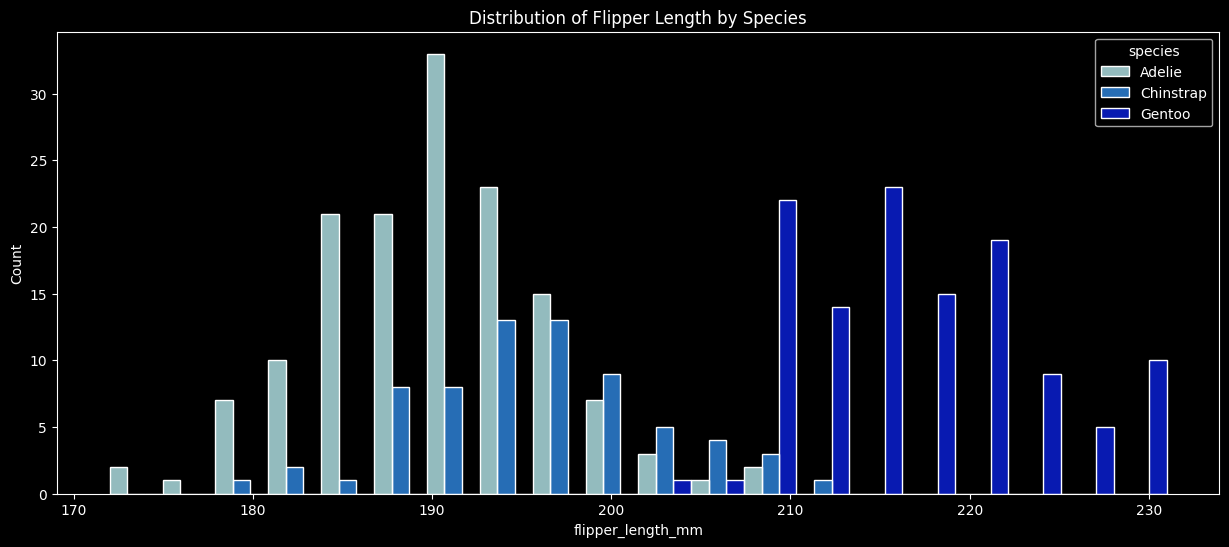

In [27]:
plt.figure(figsize=(15, 6))

sns.histplot(
    data=df,
    x='flipper_length_mm',
    hue='species',
    bins=20,  # You can adjust this number to change the granularity
    multiple="dodge",  # This creates overlapping histograms
    palette=['#C5FBFF', '#3393F3', '#0C24EE'],
    shrink=0.99
)

plt.title('Distribution of Flipper Length by Species')
plt.savefig('Graphics/Distribution_Flipper_Length_by_Species.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

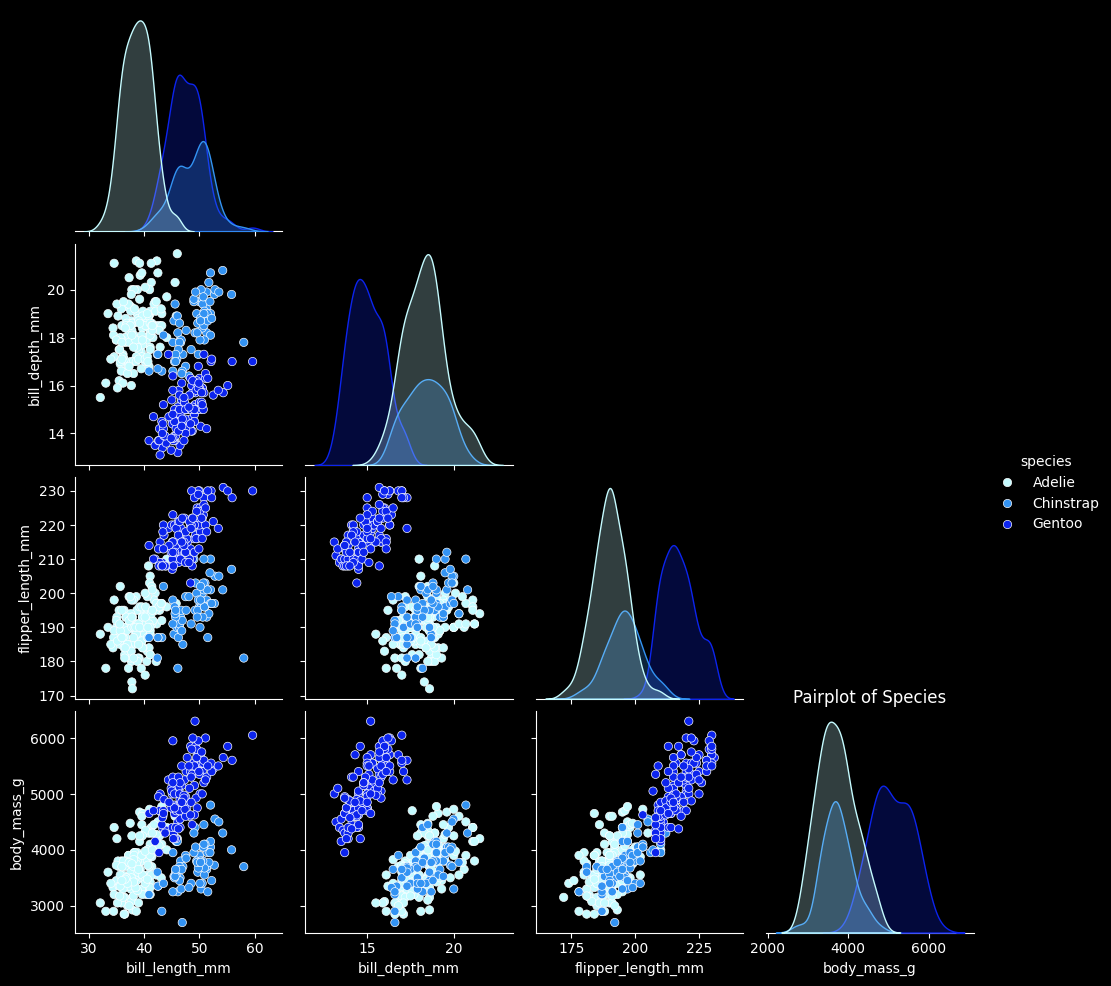

In [28]:
plt.figure(figsize=(10,10))

sns.pairplot(
    data=df,
    hue='species',
    palette=['#C5FBFF', '#3393F3','#0C24EE'],
    corner=True
)
plt.title('Pairplot of Species')
plt.savefig('Graphics/Pairplot_Species.png')
plt.show()